# Project description


We have been hired as a data scientist for a real estate company to assist the Machine Learning (ML) and development teams. The primary objective is to complete the tasks and deliver the dataframes to each team.

The tasks are written below.

ML Tasks:
*   Average rent by property type
*   Percentage of each property type in the database
*   Verify if null values exist in the database
*   Cleaning the data
*   Remove apartments with a rent value equal to zero
*   Remove apartments with a condominium value equal to zero
*   Apply the filters:
1.Apartments that have one room and rent less than 1200

2.Apartments that have at least 2 rooms, rent less than 3000, and an area greater than 70m²

*   Save the dataframe with all modifications

Dev Tasks:
*   Create the column values_per_month
*   Create the column values_per_year

values_per_month: This column must contain the monthly expenses, including the rent and condominium.

values_per_year: This column must contain the yearly expenses; in other words, the IPTU plus 12 months of rent and condominium.
*   Create the column Description
*   Create the column Have_suit










# Importing the database

In [1]:
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
pd.read_csv(url)

,Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Quitinete;Copacabana;1;0;0;40;1700;500;60
1,Casa;Jardim Botânico;2;0;1;100;7000;;
2,Conjunto Comercial/Sala;Barra da Tijuca;0;4;0;...
3,Apartamento;Centro;1;0;0;15;800;390;20
4,Apartamento;Higienópolis;1;0;0;48;800;230;
...,...
32955,Quitinete;Centro;0;0;0;27;800;350;25
32956,Apartamento;Jacarepaguá;3;1;2;78;1800;800;40
32957,Apartamento;São Francisco Xavier;2;1;0;48;1400...
32958,Apartamento;Leblon;2;0;0;70;3000;760;


To make the dataframe more readble i will separate him

In [3]:
pd.read_csv(url, sep=';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


To make the dataframe more easy for work i will attribute him on a variable, making the codes more pleasant

In [5]:
data=pd.read_csv(url, sep=';')
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# Database characteristics

In [6]:
data.shape

(32960, 9)

In [7]:
data.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB



# Exploratory data analysis(EDA)

# **ML Team tasks:**


# Average rent by property type




In [10]:
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [11]:
data['Valor'].mean()

np.float64(12952.659715265761)

Lets group by the types of property and see the mean of each one

In [14]:
data.groupby('Tipo')['Valor'].mean().sort_values(ascending=True)

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


With the mean for each property type, we can now create a graph to visualize the value proportion of each.

<Axes: ylabel='Tipo'>

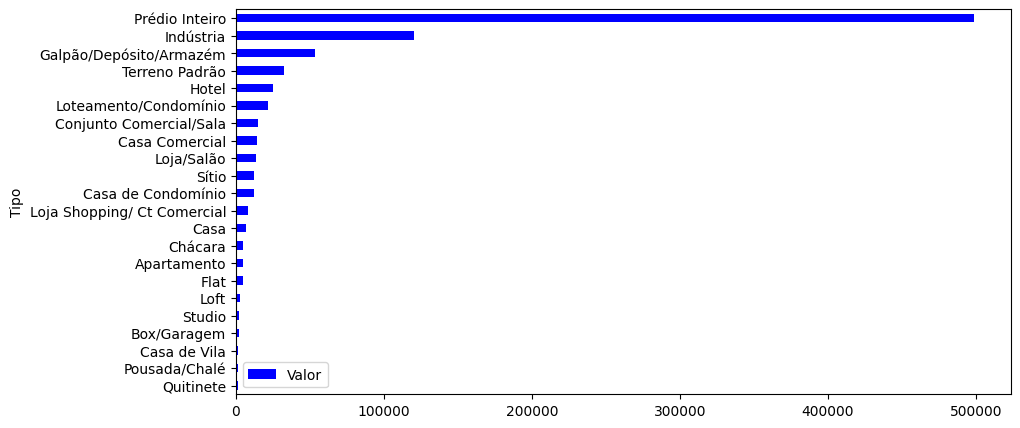

In [16]:
df_value_type=data.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_value_type.plot(kind='barh',figsize=(10,5),color='blue')

# Removing the commercial properties?

Lets see if the commercial properties are important for the database

In [18]:
data.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [19]:
comercial_propertys = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [22]:
data.query('@comercial_propertys in  Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [27]:
data.query('@comercial_propertys not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [28]:
df=data.query('@comercial_propertys not in Tipo')

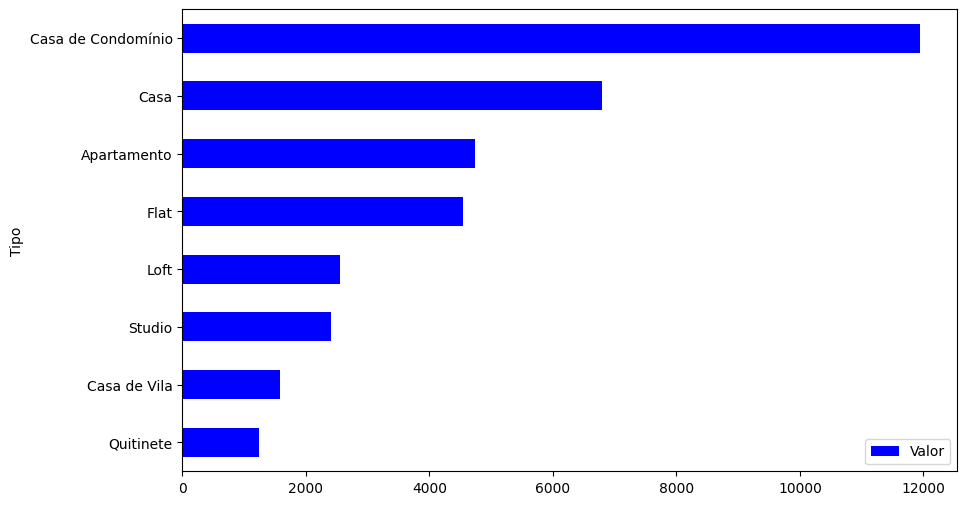

In [29]:
df_value_type=df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_value_type.plot(kind='barh', figsize=(10,6),color='blue');

# Whats the percentage of each property type in database?

In [30]:
df.Tipo.value_counts(normalize=True)

,proportion
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


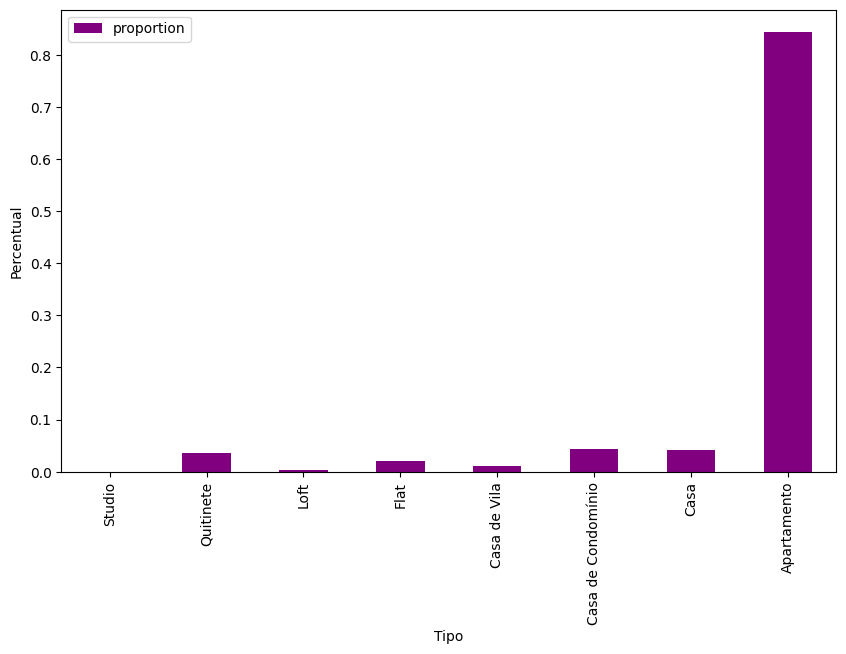

In [31]:
df_percentage_type=df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo',ascending=False)
df_percentage_type.plot(kind='bar',figsize=(10,6),color='purple',xlabel='Tipo',ylabel='Percentual');

Now we can clearly see that commercial properties are not significant in the database; they are insignificant compared to residential properties, specifically apartments.

# Select only the property type apartment

Given that the majority of properties are apartments, other types are unnecessary for the analysis.

In [32]:
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [33]:
df=df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Cleaning data

# Verify if null values exist in the database

In [34]:
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [35]:
df.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


Fill every null values for 0.

In [37]:
df=df.fillna(0)

In [38]:
df.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


# Remove apartments with a rent value equal to zero
# Remove apartments with a condominium value equal to zero

In [39]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [40]:
df.query('Valor == 0 | Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [41]:
register_to_delete=df.query('Valor == 0 | Condominio == 0').index


In [42]:
df.drop(register_to_delete,axis=0,inplace=True)

In [43]:
df.query('Valor == 0 | Condominio == 0').index

Index([], dtype='int64')

In [45]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [44]:
df.Tipo.unique()

array(['Apartamento'], dtype=object)

dropping the column tipo with df.drop('Tipo',axis=1,inplace=True)

In [51]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


# Filters

# 1.Apartments that have one room and rent less than 1200

In [58]:
select1=df['Quartos']==1
select2=df['Valor']<1200
filter1=select1 & select2
df[filter1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


# 2..Apartments that have at least 2 rooms, rent less than 3000, and an area greater than 70m²

In [61]:
select=(df['Quartos']>=2) & (df['Valor']<3000) & (df['Area']>70)
filter2=df[select]
filter2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


# Save the dataframe

In [75]:
df.to_csv('ML_data.csv')

In [76]:
pd.read_csv('ML_data.csv')

,Unnamed: 0,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [77]:
df.to_csv('ML_data.csv',index=False)
pd.read_csv('ML_data.csv')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Dev tasks:

# Creating numerical columns

In [68]:
url='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados=pd.read_csv(url,sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# Column values_per_month

In [69]:
dados['Values_per_month']=dados['Valor']+dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Values_per_month
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


# Column values_per_year

In [71]:
dados['Values_per_year']=dados['Values_per_month']*12 + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Values_per_month,Values_per_year
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


# Creating description column

In [72]:
dados['Description'] = dados['Tipo'] + ' in ' + dados['Bairro'] + ' with ' + \
                                        dados['Quartos'].astype(str) + ' room(s) ' + \
                                        ' and ' + dados['Vagas'].astype(str) + ' garage space. '
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Values_per_month,Values_per_year,Description
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete in Copacabana with 1 room(s) and 0 ...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa in Jardim Botânico with 2 room(s) and 0 ...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala in Barra da Tijuca wit...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento in Centro with 1 room(s) and 0 ga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento in Higienópolis with 1 room(s) an...


In [73]:
dados['Have_suites']=dados['Suites'].apply(lambda x: 'Yes' if x > 0 else 'No')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Values_per_month,Values_per_year,Description,Have_suites
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete in Copacabana with 1 room(s) and 0 ...,No
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa in Jardim Botânico with 2 room(s) and 0 ...,Yes
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala in Barra da Tijuca wit...,No
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento in Centro with 1 room(s) and 0 ga...,No
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento in Higienópolis with 1 room(s) an...,No


# Save the dataframe

In [78]:
dados.to_csv('dev_data.csv',index=False,sep=';')